In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/MSCallGraph/MSCallGraph_0.csv")

In [3]:
df.head()

,Unnamed: 0,traceid,timestamp,rpcid,um,rpctype,dm,interface,rt
0,0,0b133c1915919238193454000e5d37,219678,0.1.3.1.1.1.12,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...,NaN,0
1,1,0b133c1915919238193454000e5d37,219684,0.1.3.1.1.14.19,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...,NaN,1
2,2,0b133c1915919238193454000e5d37,219684,0.1.3.1.1.14.18,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...,NaN,1
3,3,0b133c1915919238193454000e5d37,219684,0.1.3.1.1.14.4,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...,NaN,1
4,4,0b133c1915919238193454000e5d37,219684,0.1.3.1.1.14.17,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...,NaN,1


In [4]:
traceids = df['traceid'].unique()

In [5]:
# tdf = df[df['traceid']==traceids[1]] # trace data frame

In [6]:
# tdf.head(), len(tdf)

In [7]:
# tdf = tdf.sort_values(by="rpcid", key=lambda col: col.str.split(".").str.len()) # to order from surface down

In [8]:
# tdf

In [9]:
# I misunderstood how rpcid works here...

# id_to_hash = {}
# for i, row in tdf.iterrows():
#     key = row["rpcid"].split(".")[-1] # last number
#     dm = row["dm"]
#     if key in id_to_hash:
#         value = id_to_hash[key]
#         if len(value)==2:
#             if dm!="(?)" and dm not in value:
#                 print("inconsistency")
#             else:
#                 print("consistent")
#         elif len(value)==1 and (dm not in value) and (dm!="(?)"):
#             value.append(dm)
#             id_to_hash[key] = value
#     elif dm!="(?)":
#         id_to_hash[key] = [row["dm"]]
# print("Done")

In [10]:
# class Node:
#     def __init__(self, id):
#         self.id = id
#         self.calls = []

In [11]:
# nodes = {}
# for i, (idx, row) in enumerate(tdf.iterrows()):
#     if row["um"] == "(?)" or str(row["um"]).lower() == "nan":
#         nodes[row["dm"]] = Node(row["dm"])
#     else:
#         if row["um"] in nodes:
#             if row["dm"] not in nodes:
#                 nodes[row["dm"]] = Node(row["dm"])
#             nodes[row["um"]].calls.append(nodes[row["dm"]])
#         else:
#             print(i)

In [12]:
# node_ids = []
# for node_id in nodes.keys():
#     node_ids.append(node_id)

In [13]:
# graph = nx.DiGraph() 

# for node_id, node in nodes.items():
#     graph.add_node(node_ids.index(node_id))
# for node_id, node in nodes.items():
#     for call in node.calls:
#         graph.add_edge(node_ids.index(node_id), node_ids.index(call.id))

# plt.figure(figsize=(13, 13))
# pos = nx.spring_layout(graph)  
# nx.draw_networkx_nodes(graph, pos, node_size=600, node_color="lightblue")
# nx.draw_networkx_edges(graph, pos, arrowstyle="->", arrowsize=20)
# nx.draw_networkx_labels(graph, pos, font_size=10, font_color="black")

# plt.title("Microservice Call Graph")
# plt.savefig("tracegraph.png")
# plt.show()

In [26]:
# def preprocess_tdf(tdf):
#     grouped = tdf.groupby(["traceid", "rpcid"])

#     def resolve_duplicates(group):
#         def is_valid(row):
#             return (
#                 row["um"] != "(?)" and str(row["um"]).lower() != "nan" and
#                 row["dm"] != "(?)" and str(row["dm"]).lower() != "nan"
#             )
        
#         complete_rows = group[group.apply(is_valid, axis=1)]
        
#         if not complete_rows.empty:
#             return complete_rows.iloc[0]
        
#         # if no valid row exists, try to combine rows to create a valid one
#         combined_row = group.iloc[0].copy() 
#         for _, row in group.iterrows():
#             # fill missing values for 'um' and 'dm'
#             if combined_row["um"] == "(?)" or str(combined_row["um"]).lower() == "nan":
#                 combined_row["um"] = row["um"]
#             if combined_row["dm"] == "(?)" or str(combined_row["dm"]).lower() == "nan":
#                 combined_row["dm"] = row["dm"]
#         return combined_row

#     tdf = grouped.apply(resolve_duplicates).reset_index(drop=True)
#     return tdf

def tracegraph(index=0, save=False):
    tdf = df[df['traceid']==traceids[index]] # trace data frame 
    # tdf = preprocess_tdf(tdf)
    tdf = tdf.sort_values(by="rpcid", key=lambda col: col.str.split(".").str.len()) # to order from surface down
    print(f"Total calls: {len(tdf)}")
    print(f"Total unique DMs: {len(tdf['dm'].unique())}")
    class Node:
        def __init__(self, id):
            self.id = id
            self.calls = []
    nodes = {}
    for i, (idx, row) in enumerate(tdf.iterrows()):
        um = row["um"]
        dm = row["dm"]
        if um == "(?)" or str(um).lower() == "nan":
            nodes[dm] = Node(dm)
        else:
            if um not in nodes:
                nodes[um] = Node(um)
            if dm not in nodes and not (dm == "(?)" or str(dm).lower() == "nan"):
                nodes[dm] = Node(dm)
            if dm in nodes:
                nodes[um].calls.append(nodes[dm])

    print(f"Total Nodes: {len(nodes)}")
    print("Note: expect off by 1 or 2 because of nan and (?)")

    node_id_to_index = {node_id: idx for idx, node_id in enumerate(nodes.keys())}

        
    graph = nx.DiGraph() 

    for node_id, node in nodes.items():
        graph.add_node(node_id_to_index[node_id])
    for node_id, node in nodes.items():
        for call in node.calls:
            graph.add_edge(node_id_to_index[node_id], node_id_to_index[call.id])
    
    plt.figure(figsize=(13, 13))
    pos = nx.spring_layout(graph)  
    nx.draw_networkx_nodes(graph, pos, node_size=600, node_color="lightblue")
    nx.draw_networkx_edges(graph, pos, arrowstyle="->", arrowsize=20)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color="black")
    
    plt.title("Microservice Call Graph")
    if save:
        plt.savefig(f"tracegraph+{index}.png")
    plt.show()

Total calls: 540
Total unique DMs: 33
Total Nodes: 32
Note: expect off by 1 or 2 because of nan and (?)


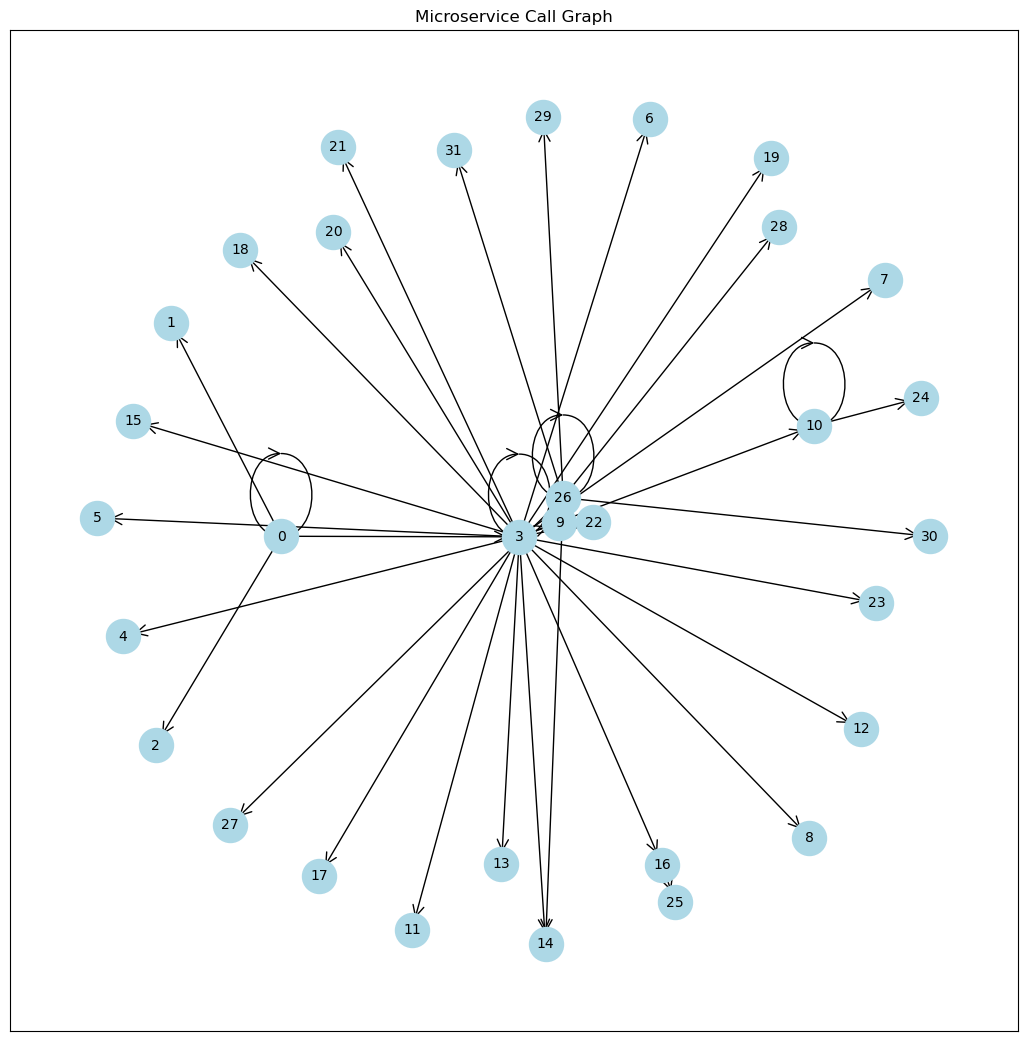

In [27]:
tracegraph(index=0)